In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import KFold, cross_validate, cross_val_score, cross_val_predict, train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, learning_curve
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score, make_scorer
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, PrecisionRecallDisplay

from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB


from sklearn.feature_selection import SelectKBest, chi2 
from sklearn.pipeline import Pipeline



from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import TomekLinks,RandomUnderSampler

from collections import Counter

from sklearn.preprocessing import LabelEncoder

In [48]:
df = pd.read_csv("df_preprocessed.csv", skipinitialspace= True)
df.head()

,tweet,is_hate_speech,dataset,retweet_count,favorite_count,is_reply,is_quote,statuses_count,followers_count,friends_count,...,Hash_words_ad,clean_tweet,clean_anonymized_description,tweet_len,word_count,tokenized_text,pos_tags,lemmatized_text,stemmed_text,swear_word_bin
0,@unknown Con tutte le denunce che si sta becca...,1,0,0.0,6.0,1.0,0.0,554.0,748.0,753.0,...,No hashtags,Con tutte le denunce che si sta beccando Salvi...,Avete presente quegli stereotipi sui siciliani...,120,20,"['denunce', 'beccando', 'Salvini', 'rischia', ...","[('denunce', 'NOUN'), ('beccando', 'VERB'), ('...","['denuncia', 'beccare', 'Salvini', 'rischiare'...","['denunc', 'becc', 'salvin', 'risc', 'aument',...",0
1,#PRESCRIZIONE : I (t)re magi hanno trovato l’a...,0,0,154.0,448.0,0.0,0.0,35043.0,10838.0,4535.0,...,No hashtags,PRESCRIZIONE I tre magi hanno trovato laccord...,Prof di latino e Deputata PDAma lo sport la Ro...,255,46,"['PRESCRIZIONE', 'tre', 'magi', 'trovato', 'la...","[('PRESCRIZIONE', 'VERB'), ('tre', 'NUM'), ('m...","['PRESCRIZIONE', 'tre', 'mago', 'trovare', 'la...","['prescrizion', 'tre', 'mag', 'trov', 'laccord...",0
2,Il #m5s ha votato contro le #unionicivili addu...,1,0,195.0,638.0,0.0,0.0,139750.0,7971.0,1866.0,...,No hashtags,Il m5s ha votato contro le unionicivili adduce...,Medico appassionato di Cinema dAutore Musica e...,255,40,"['m5s', 'votato', 'unionicivili', 'adducendo',...","[('m5s', 'NOUN'), ('votato', 'VERB'), ('unioni...","['m5s', 'votare', 'unionicivile', 'adducere', ...","['m5s', 'vot', 'unionicivil', 'adduc', 'scus',...",1
3,La #Lega e il #m5s stanno dando a bere all'opi...,0,0,112.0,377.0,0.0,0.0,3356.0,8493.0,5303.0,...,No hashtags,La Lega e il m5s stanno dando a bere allopinio...,nodescription,246,38,"['Lega', 'm5s', 'dando', 'bere', 'allopinione'...","[('Lega', 'VERB'), ('m5s', 'PROPN'), ('dando',...","['lega', 'm5s', 'dare', 'bere', 'allopinione',...","['leg', 'm5s', 'dand', 'ber', 'allopinion', 'p...",0
4,Che cosa cambia questa #legge? Caro @667517147...,0,0,45.0,143.0,0.0,0.0,11234.0,10815.0,1810.0,...,No hashtags,Che cosa cambia questa legge Caro con il decr...,Veneto Assessore Regionale Sviluppo Economico ...,195,31,"['cambia', 'legge', 'Caro', 'decretoinsicurezz...","[('cambia', 'VERB'), ('legge', 'NOUN'), ('Caro...","['cambiare', 'legge', 'Caro', 'decretoinsicure...","['camb', 'legg', 'car', 'decretoinsicurezz', '...",0


In [49]:
X = df['clean_tweet'].values
y = df['is_hate_speech'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=0)


In [50]:
TFvectorizer = TfidfVectorizer(
                              ngram_range=(1,1),
                               max_df=.75,
                               min_df = 2
                               )

X_train_tfid = TFvectorizer.fit_transform(X_train)
X_test_tfid = TFvectorizer.transform(X_test)


In [51]:
Cntvectorizer = CountVectorizer( # 
                                 ngram_range=(1,1),   # hyperparameter
                                 max_df=.75,
                                 min_df = 2)

X_train_cnt = Cntvectorizer.fit_transform(X_train)
X_test_cnt = Cntvectorizer.transform(X_test)

#Looking at the distribution of labels in the target variable, as well as info on the X_train matrix
print(np.unique(y_train, return_counts=True))

(array([0, 1], dtype=int64), array([4655, 2290], dtype=int64))


In [52]:
clf = MultinomialNB()
clf.fit(X_train_cnt, y_train)

y_pred = clf.predict(X_test_cnt)

accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred, digits = 3)

print('Accuracy:', accuracy)
print('F1-score_macro:', f1_scores)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.804501175680215
F1-score_macro: 0.7704210459366204
Classification Report:
              precision    recall  f1-score   support

           0      0.832     0.887     0.859      1996
           1      0.735     0.636     0.682       981

    accuracy                          0.805      2977
   macro avg      0.784     0.762     0.770      2977
weighted avg      0.800     0.805     0.801      2977



In [53]:
clf = MultinomialNB()
clf.fit(X_train_tfid, y_train)

y_pred = clf.predict(X_test_tfid)

accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred, digits = 3)

print('Accuracy:', accuracy)
print('F1-score_macro:', f1_scores)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.7725898555592878
F1-score_macro: 0.6724590876343789
Classification Report:
              precision    recall  f1-score   support

           0      0.751     0.988     0.854      1996
           1      0.934     0.333     0.491       981

    accuracy                          0.773      2977
   macro avg      0.843     0.661     0.672      2977
weighted avg      0.811     0.773     0.734      2977



### Pipeline TFidfVectorizer

In [54]:


# List of text representations
text_representations = ['tokenized_text', 'lemmatized_text']

# Dictionary to store final best results
final_results_dict_tfidf = {}

for text_representation in text_representations:
    X = df[text_representation].values
    y = df['is_hate_speech'].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=0)

    # Define a pipeline with TfidfVectorizer and Multinomial Naive Bayes
    tfidf_vectorizer = TfidfVectorizer()
    m_NB = MultinomialNB()

    tfidf_pipe = Pipeline([
        ('vect', tfidf_vectorizer),
        ('sel', SelectKBest(chi2)),
        ('clf', m_NB),
    ])

    # Define parameter grid for RandomizedSearchCV
    param_grid_tfidf = {
        'sel__k':[50,100,200,500,1000,'all'],
        'vect__ngram_range': [(1,1), (1, 2), (1, 3)],
        'vect__max_df': [0.75, 0.8, 0.85,0.9],
        'vect__min_df': [2, 5, 7, 10],
        'clf__fit_prior': [True, False],
        'clf__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    }

    # Create RandomizedSearchCV
    random_search_count = RandomizedSearchCV(
        tfidf_pipe, param_distributions=param_grid_tfidf, scoring='f1_macro',
        n_iter=175, cv=5, n_jobs=15, random_state=42
    )

    # Perform RandomizedSearchCV
    random_search_count.fit(X_train, y_train)

    # Store final best results
    final_results_dict_tfidf[text_representation] = {
        'best_parameters': random_search_count.best_params_,
        'best_f1_score': random_search_count.best_score_,
    }

    # Print best parameters and accuracy
    print(f"Best Parameters for TfidfVectorizer ({text_representation} - RandomizedSearchCV):")
    print(random_search_count.best_params_)
    print("Best f1-score:", random_search_count.best_score_)


    # Evaluate the best model on the test set
    y_pred_tfidf = random_search_count.best_estimator_.predict(X_test)

    accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
    f1_scores_tfidf = f1_score(y_test, y_pred_tfidf, average='macro')
    classification_rep_tfidf = classification_report(y_test, y_pred_tfidf, digits=3)

    print(f'Accuracy (TfidfVectorizer - {text_representation}):', accuracy_tfidf)
    print(f'F1-score_macro (TfidfVectorizer - {text_representation}):', f1_scores_tfidf)
    print(f'Classification Report (TfidfVectorizer - {text_representation}):')
    print(classification_rep_tfidf)

    print("                                                                                                                                 ")
    print("                                                                                                                                 ")
    print("#################################################################################################################################")


# Convert the dictionary to JSON format
final_results_json_tfidf = json.dumps(final_results_dict_tfidf, indent=2)

# Save the JSON to a file
with open('final_results_tfidf_NB.json', 'w') as file:
    file.write(final_results_json_tfidf)


Best Parameters for TfidfVectorizer (tokenized_text - RandomizedSearchCV):
{'vect__ngram_range': (1, 1), 'vect__min_df': 2, 'vect__max_df': 0.75, 'sel__k': 200, 'clf__fit_prior': False, 'clf__alpha': 1}
Best f1-score: 0.7906585889856601
Accuracy (TfidfVectorizer - tokenized_text): 0.8172657037285859
F1-score_macro (TfidfVectorizer - tokenized_text): 0.7771559410845204
Classification Report (TfidfVectorizer - tokenized_text):
              precision    recall  f1-score   support

           0      0.824     0.926     0.872      1996
           1      0.798     0.596     0.683       981

    accuracy                          0.817      2977
   macro avg      0.811     0.761     0.777      2977
weighted avg      0.815     0.817     0.809      2977

                                                                                                                                 
                                                                                                                  

### Pipeline CountVectorizer

In [55]:
# List of text representations
text_representations = ['tokenized_text','lemmatized_text']

# Dictionary to store final best results
final_results_dict_count = {}

for text_representation in text_representations:
    X = df[text_representation].values
    y = df['is_hate_speech'].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=0)

    # Define a pipeline with CountVectorizer and Multinomial Naive Bayes
    count_vectorizer = CountVectorizer()
    
    m_NB = MultinomialNB()

    count_pipe = Pipeline([
        ('vect', tfidf_vectorizer),
        ('sel', SelectKBest(chi2)),
        ('clf', m_NB)
,
    ])

    # Define parameter grid for RandomizedSearchCV
    param_grid_count = {
        'sel__k':[50,100,200,500,1000,'all'],
        'vect__ngram_range': [(1,1), (1, 2), (1, 3)],
        'vect__max_df': [0.75, 0.8, 0.85,0.9],
        'vect__min_df': [2, 5, 7, 10],
        'clf__fit_prior': [True, False],
        'clf__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    }

    # Create RandomizedSearchCV
    random_search_count = RandomizedSearchCV(
        tfidf_pipe, param_distributions=param_grid_tfidf, scoring='f1_macro',
        n_iter=175, cv=5, n_jobs=15, random_state=42
    )

    # fit RandomizedSearchCV
    random_search_count.fit(X_train, y_train)

    # Store final best results
    final_results_dict_count[text_representation] = {
        'best_parameters': random_search_count.best_params_,
        'best_f1_score': random_search_count.best_score_,
    }

    # Print best parameters and accuracy
    print(f"Best Parameters for CountVectorizer ({text_representation} - RandomizedSearchCV):")
    print(random_search_count.best_params_)
    print("Best f1-score:", random_search_count.best_score_)

    print("                                                                                                                                 ")
    print("                                                                                                                                 ")

    # Evaluate the best model on the test set
    y_pred_count = random_search_count.best_estimator_.predict(X_test)

    accuracy_count = accuracy_score(y_test, y_pred_count)
    f1_scores_count = f1_score(y_test, y_pred_count, average='macro')
    classification_rep_count = classification_report(y_test, y_pred_count, digits=3)

    print(f'Accuracy (CountVectorizer - {text_representation}):', accuracy_count)
    print(f'F1-score_macro (CountVectorizer - {text_representation}):', f1_scores_count)
    print(f'Classification Report (CountVectorizer - {text_representation}):')
    print(classification_rep_count)

# Convert the dictionary to JSON format
final_results_json_count = json.dumps(final_results_dict_count, indent=2)

# Save the JSON to a file
with open('final_results_count_NB.json', 'w') as file:
    file.write(final_results_json_count)


Best Parameters for CountVectorizer (tokenized_text - RandomizedSearchCV):
{'vect__ngram_range': (1, 1), 'vect__min_df': 2, 'vect__max_df': 0.75, 'sel__k': 200, 'clf__fit_prior': False, 'clf__alpha': 1}
Best f1-score: 0.7906585889856601
                                                                                                                                 
                                                                                                                                 
Accuracy (CountVectorizer - tokenized_text): 0.8172657037285859
F1-score_macro (CountVectorizer - tokenized_text): 0.7771559410845204
Classification Report (CountVectorizer - tokenized_text):
              precision    recall  f1-score   support

           0      0.824     0.926     0.872      1996
           1      0.798     0.596     0.683       981

    accuracy                          0.817      2977
   macro avg      0.811     0.761     0.777      2977
weighted avg      0.815     0.817     0

### Balancing for TFidfVectorizer
- {'vect__ngram_range': (1, 1), 'vect__min_df': 2, 'vect__max_df': 0.75, 'sel__k': 200, 'clf__fit_prior': False, 'clf__alpha': 1}


In [56]:
X = df['tokenized_text'].values
y = df['is_hate_speech'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=42)


# TfidfVectorizer
TFvectorizer = TfidfVectorizer(
    ngram_range=(1, 1),
    max_df=0.75,
    min_df=2
)

X_train_tfid = TFvectorizer.fit_transform(X_train)
X_test_tfid = TFvectorizer.transform(X_test)

# Feature selection with SelectKBest
k_best = SelectKBest((chi2), k=200)

X_train_tfid_selected = k_best.fit_transform(X_train_tfid, y_train)
X_test_tfid_selected = k_best.transform(X_test_tfid)

# Tomek Links
tom = TomekLinks()
X_res_tomek, y_res_tomek = tom.fit_resample(X_train_tfid_selected, y_train)
print('Tomek Resampled dataset shape %s' % Counter(y_res_tomek))

# Tomek Links
clf_tomek = MultinomialNB(fit_prior = False, alpha = 1 )

clf_tomek.fit(X_res_tomek, y_res_tomek)

y_pred_tomek = clf_tomek.predict(X_test_tfid_selected)

accuracy_tomek = accuracy_score(y_test, y_pred_tomek)
f1_scores_tomek = f1_score(y_test, y_pred_tomek, average='macro')
classification_rep_tomek = classification_report(y_test, y_pred_tomek,digits = 3)

print('Tomek Links:')
print('Accuracy:', accuracy_tomek)
print('F1-score_macro:', f1_scores_tomek)
print('Classification Report:')
print(classification_rep_tomek)

# SMOTE
smote = SMOTE(random_state=42)
X_res_smote, y_res_smote = smote.fit_resample(X_train_tfid_selected, y_train)
print('SMOTE Resampled dataset shape %s' % Counter(y_res_smote))

#Classifier
clf_smote = MultinomialNB(fit_prior = False, alpha = 1 )

clf_smote.fit(X_res_smote, y_res_smote)

y_pred_smote = clf_smote.predict(X_test_tfid_selected)

accuracy_smote = accuracy_score(y_test, y_pred_smote)
f1_scores_smote = f1_score(y_test, y_pred_smote, average='macro')
classification_rep_smote = classification_report(y_test, y_pred_smote, digits =3)

print('SMOTE:')
print('Accuracy:', accuracy_smote)
print('F1-score_macro:', f1_scores_smote)
print('Classification Report:')
print(classification_rep_smote)

# ADASYN
adasyn = ADASYN(random_state = 42)
X_res_adasyn, y_res_adasyn = adasyn.fit_resample(X_train_tfid_selected, y_train)
print('ADASYN Resampled dataset shape %s' % Counter(y_res_adasyn))


clf_adasyn = MultinomialNB(fit_prior = False, alpha = 1 )

clf_adasyn.fit(X_res_adasyn, y_res_adasyn)

y_pred_adasyn = clf_adasyn.predict(X_test_tfid_selected)

accuracy_adasyn = accuracy_score(y_test, y_pred_adasyn)
f1_scores_adasyn = f1_score(y_test, y_pred_adasyn, average='macro')
classification_rep_adasyn = classification_report(y_test, y_pred_adasyn, digits =3 )

print('ADASYN:')
print('Accuracy:', accuracy_adasyn)
print('F1-score_macro:', f1_scores_adasyn)
print('Classification Report:')
print(classification_rep_adasyn)


Tomek Resampled dataset shape Counter({0: 4404, 1: 2290})
Tomek Links:
Accuracy: 0.8256634195498824
F1-score_macro: 0.7900573588825146
Classification Report:
              precision    recall  f1-score   support

           0      0.835     0.923     0.877      1996
           1      0.800     0.628     0.704       981

    accuracy                          0.826      2977
   macro avg      0.817     0.775     0.790      2977
weighted avg      0.823     0.826     0.820      2977

SMOTE Resampled dataset shape Counter({0: 4655, 1: 4655})
SMOTE:
Accuracy: 0.8263352368155862
F1-score_macro: 0.7907268226654403
Classification Report:
              precision    recall  f1-score   support

           0      0.835     0.924     0.877      1996
           1      0.802     0.628     0.704       981

    accuracy                          0.826      2977
   macro avg      0.818     0.776     0.791      2977
weighted avg      0.824     0.826     0.820      2977

ADASYN Resampled dataset shape Count

### Balancing for CountVectorizer

{'vect__ngram_range': (1, 1), 'vect__min_df': 2, 'vect__max_df': 0.75, 'sel__k': 200, 'clf__fit_prior': False, 'clf__alpha': 1}


In [57]:



X = df['tokenized_text'].values
y = df['is_hate_speech'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=42)

# CountVectorizer
vectorizer = CountVectorizer(
    ngram_range=(1, 1),
    max_df=0.75,
    min_df=2
)

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

# Feature selection with SelectKBest
k_best = SelectKBest(chi2, k=200)
X_train_count_selected = k_best.fit_transform(X_train_count, y_train)
X_test_count_selected = k_best.transform(X_test_count)

# Tomek Links
tom = TomekLinks()
X_res_tomek, y_res_tomek = tom.fit_resample(X_train_count_selected, y_train)
print('Tomek Resampled dataset shape %s' % Counter(y_res_tomek))

# Tomek Links
clf_tomek = MultinomialNB(fit_prior = False, alpha = 1 )

clf_tomek.fit(X_res_tomek, y_res_tomek)

y_pred_tomek = clf_tomek.predict(X_test_count_selected)

accuracy_tomek = accuracy_score(y_test, y_pred_tomek)
f1_scores_tomek = f1_score(y_test, y_pred_tomek, average='macro')
classification_rep_tomek = classification_report(y_test, y_pred_tomek, digits =3 )

print('Tomek Links:')
print('Accuracy:', accuracy_tomek)
print('F1-score_macro:', f1_scores_tomek)
print('Classification Report:')
print(classification_rep_tomek)

# SMOTE
smote = SMOTE(random_state = 42)
X_res_smote, y_res_smote = smote.fit_resample(X_train_count_selected, y_train)
print('SMOTE Resampled dataset shape %s' % Counter(y_res_smote))

clf_smote = MultinomialNB(fit_prior = False, alpha = 1 )

clf_smote.fit(X_res_smote, y_res_smote)

y_pred_smote = clf_smote.predict(X_test_count_selected)

accuracy_smote = accuracy_score(y_test, y_pred_smote)
f1_scores_smote = f1_score(y_test, y_pred_smote, average='macro')
classification_rep_smote = classification_report(y_test, y_pred_smote, digits = 3 )

print('SMOTE:')
print('Accuracy:', accuracy_smote)
print('F1-score_macro:', f1_scores_smote)
print('Classification Report:')
print(classification_rep_smote)

# ADASYN
adasyn = ADASYN(random_state = 42)
X_res_adasyn, y_res_adasyn = adasyn.fit_resample(X_train_count_selected, y_train)
print('ADASYN Resampled dataset shape %s' % Counter(y_res_adasyn))


clf_adasyn = MultinomialNB(fit_prior = False, alpha = 1 )

clf_adasyn.fit(X_res_adasyn, y_res_adasyn)

y_pred_adasyn = clf_adasyn.predict(X_test_count_selected)

accuracy_adasyn = accuracy_score(y_test, y_pred_adasyn)
f1_scores_adasyn = f1_score(y_test, y_pred_adasyn, average='macro')
classification_rep_adasyn = classification_report(y_test, y_pred_adasyn, digits= 3)

print('ADASYN:')
print('Accuracy:', accuracy_adasyn)
print('F1-score_macro:', f1_scores_adasyn)
print('Classification Report:')
print(classification_rep_adasyn)


Tomek Resampled dataset shape Counter({0: 4652, 1: 2290})
Tomek Links:
Accuracy: 0.8290225058784011
F1-score_macro: 0.7939650923340601
Classification Report:
              precision    recall  f1-score   support

           0      0.837     0.926     0.879      1996
           1      0.807     0.632     0.709       981

    accuracy                          0.829      2977
   macro avg      0.822     0.779     0.794      2977
weighted avg      0.827     0.829     0.823      2977

SMOTE Resampled dataset shape Counter({0: 4655, 1: 4655})
SMOTE:
Accuracy: 0.8122270742358079
F1-score_macro: 0.7816524575830086
Classification Report:
              precision    recall  f1-score   support

           0      0.843     0.885     0.863      1996
           1      0.739     0.665     0.700       981

    accuracy                          0.812      2977
   macro avg      0.791     0.775     0.782      2977
weighted avg      0.809     0.812     0.810      2977

ADASYN Resampled dataset shape Count

# Confusion Matrix and PR curve
{'vect__ngram_range': (1, 1), 'vect__min_df': 2, 'vect__max_df': 0.75, 'sel__k': 200, 'clf__fit_prior': False, 'clf__alpha': 1}


Tomek Links:
Accuracy: 0.8290225058784011
F1-score_macro: 0.7939650923340601
Classification Report:
              precision    recall  f1-score   support

           0      0.837     0.926     0.879      1996
           1      0.807     0.632     0.709       981

    accuracy                          0.829      2977
   macro avg      0.822     0.779     0.794      2977
weighted avg      0.827     0.829     0.823      2977



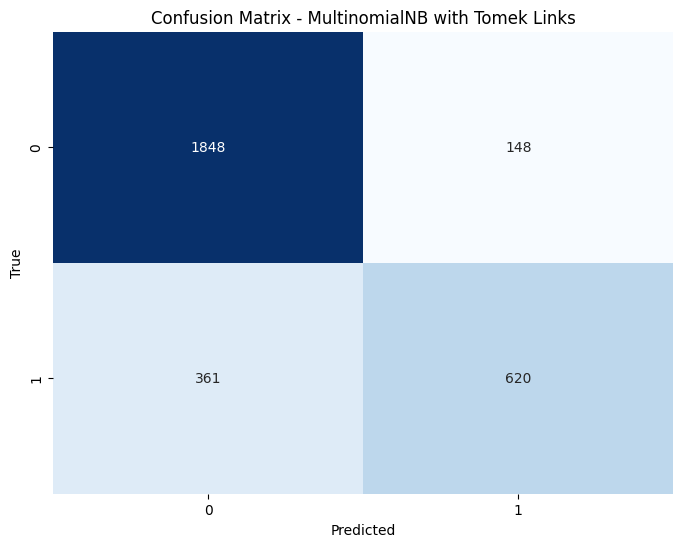

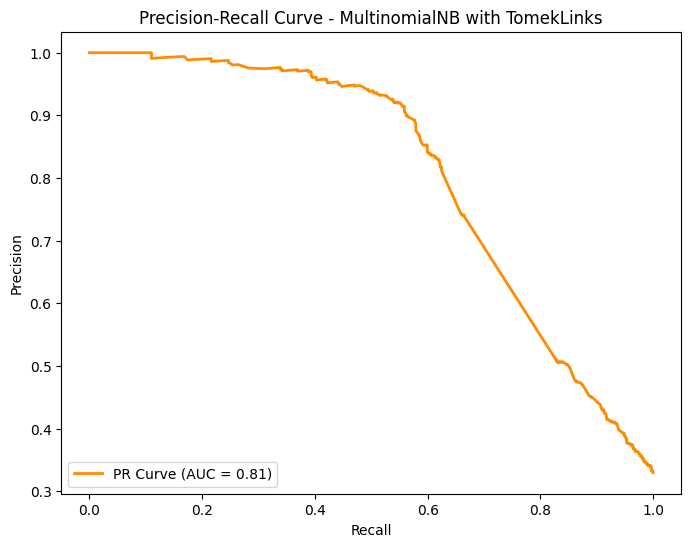

Precision-Recall Metrics:
AUC Score: 0.8069740576489454


In [58]:
X = df['tokenized_text'].values
y = df['is_hate_speech'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=42)


# TfidfVectorizer
vectorizer = CountVectorizer(
    ngram_range=(1, 1),
    max_df=0.75,
    min_df=2
)

X_train_tfid = vectorizer.fit_transform(X_train)
X_test_tfid = vectorizer.transform(X_test)

# Feature selection with SelectKBest
k_best = SelectKBest((chi2), k=200)

X_train_tfid_selected = k_best.fit_transform(X_train_tfid, y_train)
X_test_tfid_selected = k_best.transform(X_test_tfid)


# SVC with Tomek Links
clf_tomek = MultinomialNB(fit_prior = False, alpha = 1 )


clf_tomek.fit(X_res_tomek, y_res_tomek)

y_pred_tomek = clf_tomek.predict(X_test_tfid_selected)

accuracy_tomek = accuracy_score(y_test, y_pred_tomek)
f1_scores_tomek = f1_score(y_test, y_pred_tomek, average='macro')
classification_rep_tomek = classification_report(y_test, y_pred_tomek, digits = 3)

print('Tomek Links:')
print('Accuracy:', accuracy_tomek)
print('F1-score_macro:', f1_scores_tomek)
print('Classification Report:')
print(classification_rep_tomek)

cm = confusion_matrix(y_test, y_pred_tomek)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - MultinomialNB with Tomek Links')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, clf_smote.predict_proba(X_test_tfid_selected)[:, 1])

# Calculate area under the curve (AUC)
auc_score = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='PR Curve (AUC = {:.2f})'.format(auc_score))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - MultinomialNB with TomekLinks')
plt.legend(loc='lower left')
plt.show()

# Display precision-recall metrics
print("Precision-Recall Metrics:")
print("AUC Score:", auc_score)


## Model with MetaData

In [59]:
df = pd.read_csv("df_preprocessed.csv", skipinitialspace= True)
df = df.drop(['Hash_words_ad','Hash_words_tweet','anonymized_description','tweet','Weighted_Engagement','clean_anonymized_description', 'clean_tweet', 'lemmatized_text', 'stemmed_text', 'pos_tags'], axis = 1 )
df.head()

,is_hate_speech,dataset,retweet_count,favorite_count,is_reply,is_quote,statuses_count,followers_count,friends_count,device,tweet_len,word_count,tokenized_text,swear_word_bin
0,1,0,0.0,6.0,1.0,0.0,554.0,748.0,753.0,5,120,20,"['denunce', 'beccando', 'Salvini', 'rischia', ...",0
1,0,0,154.0,448.0,0.0,0.0,35043.0,10838.0,4535.0,5,255,46,"['PRESCRIZIONE', 'tre', 'magi', 'trovato', 'la...",0
2,1,0,195.0,638.0,0.0,0.0,139750.0,7971.0,1866.0,5,255,40,"['m5s', 'votato', 'unionicivili', 'adducendo',...",1
3,0,0,112.0,377.0,0.0,0.0,3356.0,8493.0,5303.0,3,246,38,"['Lega', 'm5s', 'dando', 'bere', 'allopinione'...",0
4,0,0,45.0,143.0,0.0,0.0,11234.0,10815.0,1810.0,4,195,31,"['cambia', 'legge', 'Caro', 'decretoinsicurezz...",0


In [60]:
X_tweet = df['tokenized_text'].values
y = df['is_hate_speech'].values


In [61]:
#try Tfid vectorizer same approach 


TFvectorizer = TfidfVectorizer(
                              ngram_range=(1,3),
                               max_df=.8,
                               min_df = 2
                               )

X_tweet_tfid = TFvectorizer.fit_transform(X_tweet)


In [62]:
Cntvectorizer = CountVectorizer( # 
                                 ngram_range=(1,1),   # hyperparameter
                                 max_df=.75,
                                 min_df = 2)

X_tweet_cnt = Cntvectorizer.fit_transform(X_tweet)


### Create just metadata df

- create df_meta (droping categorical and date)
- merged_sparse is for merging vectorized tweet and the rest of meta-data ( in this case all 10k)
- Split to train and test set

In [63]:
df_meta = pd.read_csv("dataset_final.csv", skipinitialspace= True)
df_meta = df.drop(['is_hate_speech', 'tokenized_text', 'tweet_len'], axis = 1 )

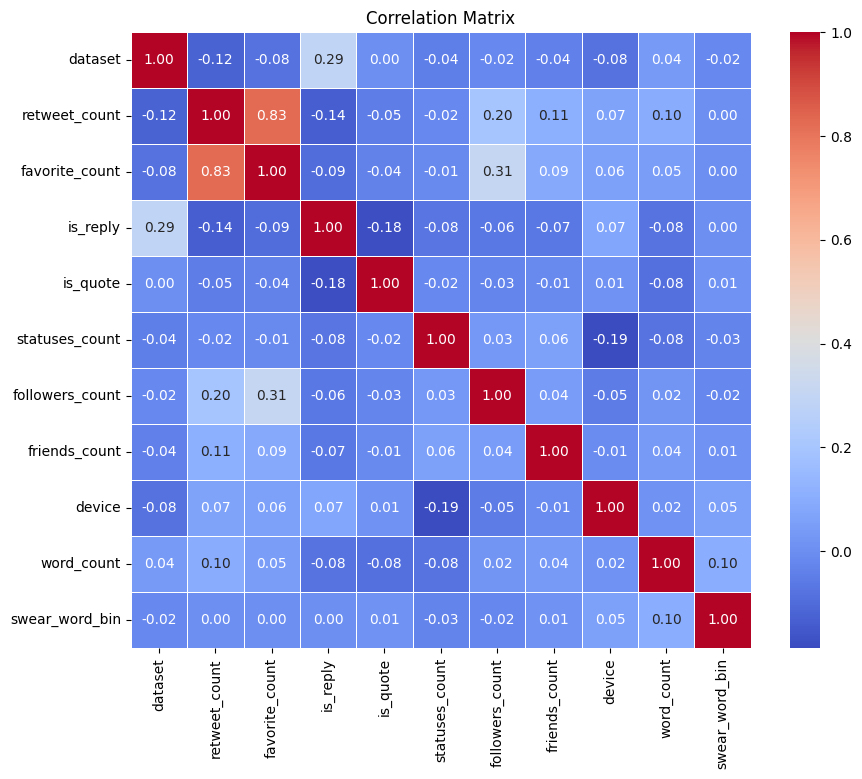

In [64]:
correlation_matrix = df_meta.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [65]:
df_meta = df_meta.values

In [66]:
# MERGE vectorized Tweet and metadata
# Keep SPARSE MATRIX

from scipy.sparse import hstack

merged_sparse_cnt = hstack([X_tweet_cnt, df_meta])


# Print the shape of the merged sparse matrix
print(merged_sparse_cnt.shape)

(9922, 12209)


In [67]:
# MERGE vectorized Tweet and metadata
# Keep SPARSE MATRIX

from scipy.sparse import hstack

merged_sparse_tfid = hstack([X_tweet_tfid, df_meta])


# Print the shape of the merged sparse matrix
print(merged_sparse_tfid.shape)

(9922, 20082)


In [68]:
#Split to train and test set for both vectorizers

X_train_meta_cnt, X_test_meta_cnt, y_train, y_test = train_test_split(merged_sparse_cnt, y, stratify = y, test_size=0.3, random_state=0)
X_train_meta_tfid, X_test_meta_tfid, y_train, y_test = train_test_split(merged_sparse_tfid, y, stratify = y, test_size=0.3, random_state=0)


In [69]:
print(X_train_meta_cnt.shape)
print(X_train_meta_tfid.shape)

(6945, 12209)
(6945, 20082)


In [70]:
clf = MultinomialNB(fit_prior = False, alpha = 1 )

clf.fit(X_train_meta_cnt, y_train)

y_pred = clf.predict(X_test_meta_cnt)


accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('F1-score_macro:', f1_scores)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.43500167954316427
F1-score_macro: 0.4161454631272399
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.19      0.31      1996
           1       0.36      0.93      0.52       981

    accuracy                           0.44      2977
   macro avg       0.61      0.56      0.42      2977
weighted avg       0.69      0.44      0.38      2977



In [71]:
# Feature selection with SelectKBest
k_best = SelectKBest(chi2, k=100)

X_train_selected = k_best.fit_transform(X_train_meta_cnt, y_train)
X_test_selected = k_best.transform(X_test_meta_cnt)


clf = MultinomialNB(fit_prior = False, alpha = 1)

clf.fit(X_train_selected, y_train)

y_pred = clf.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred, digits=3)

print('Accuracy:', accuracy)
print('F1-score_macro:', f1_scores)
print('Classification Report:')
print(classification_rep)


Accuracy: 0.4346657709103124
F1-score_macro: 0.4157253802899583
Classification Report:
              precision    recall  f1-score   support

           0      0.852     0.190     0.311      1996
           1      0.361     0.933     0.521       981

    accuracy                          0.435      2977
   macro avg      0.607     0.561     0.416      2977
weighted avg      0.690     0.435     0.380      2977

